# Thư Viện


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Đọc dữ liệu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:
cd /content/drive/MyDrive/chuyen de

/content/drive/MyDrive/chuyen de


In [5]:
ls

KLTN/


In [6]:
# import zipfile

# with zipfile.ZipFile('/content/drive/MyDrive/chuyen de/KLTN.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/chuyen de')

# # Hiển thị danh sách các tệp sau khi giải nén

In [7]:
print("Các tệp sau khi giải nén:")
print(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

Các tệp sau khi giải nén:
['a594c8d0fc2c32143904e2250c97a3b9.csv', 'a599db325c0ea95a5d2cbf166bd4f146.csv', 'a5aa25da0716b23ef6e45eea0c45fdf8.csv', 'a5b7be1abd02893d5d38fafb88803c47.csv', 'a5f45f247ea4a498913a6383ef88fdaa.csv', 'a5d33fafe0df4d1fe044c3e8909374e5.csv', 'a6124bb49c6afa1e5f1cf53d3359194d.csv', 'a6143f9f1eed168bd494b4ca898dd3a4.csv', 'a5fe6ecab589b57be4f20d0afc7b10df.csv', 'a6346859f48ca0b37e60d1c1c8d2d6f3.csv', 'a621cabbb45fb0710c7f442e8c1304f6.csv', 'a66d9f81d66c0a23a013274eb0fde48f.csv', 'a6388df7b041a3c7f96f9ba63fc71f4d.csv', 'a67746facb6d94e5b2838b7a7a993887.csv', 'a6916dca4424fbcc1f9bd93db6f382a3.csv', 'a6a5161f0b12299bba9f587ac06585e5.csv', 'a6aba593c9ebcd200c6322fd3d8842d7.csv', 'a6c1c393ab2e59691f1644a226fa4ada.csv', 'a6b29387b581e7f10a86ab4cf5bd237b.csv', 'a6da56caad1dbc54e468500a131b27f2.csv', 'a6d27bf48ae80c8eb4140b07bffa9d77.csv', 'a6dcdc997dae517585998744c779015e.csv', 'a7060a33acda4c07f718f8482d01727b.csv', 'a6ff17e1fa01c403b8baf69500136607.csv', 'a6f5d83206fb

In [8]:
len(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

2900

In [9]:
def calculate_gpa(df_new):
  tong_diem = 0
  tong_tin = 0
  mon_chua_qua = []

  mon_ = df_new.columns.get_level_values('Tên HP')
  tin_ = df_new.columns.get_level_values('Số TC')

  for i in range(len(tin_)):
    diem = df_new.iloc[0]
    if diem[i] > 4.0 :
      tong_diem += diem[i]*tin_[i]
      tong_tin += tin_[i]
    # else :
    #   mon_chua_qua.append([mon_[i],tin_[i]])

  # print('Tổng tín đã học qua : ',tong_tin)
  # for v in mon_chua_qua :
  #   print('Môn chưa qua :',v[0] ,', TC :',v[1])
  if tong_tin <= 0 : return 0
  gpa =  tong_diem / tong_tin
  return gpa



In [10]:
file_nganh_ = pd.read_csv('/content/drive/MyDrive/CDTN K2 Chủ đề 9/Nganh.csv')

In [11]:
dfs = []

def split_(nganh):
    letters = ''.join([char for char in nganh if char.isalpha()])
    numbers = ''.join([char for char in nganh if char.isdigit()])
    return letters, numbers

for i,row in file_nganh_.iterrows():
    file_name = row['hash']+'.csv'
    row_nganh = row['Nganh']

    csv_file_path = os.path.join('/content/drive/MyDrive/chuyen de/KLTN',file_name)

    csv_df = pd.read_csv(csv_file_path)

    csv_df_new = csv_df.pivot_table(values='Điểm', columns= ['Tên HP','Số TC','Mã HP'])
    csv_df_new = csv_df_new.reset_index(drop=True)
    csv_df_new['GPA'] = calculate_gpa(csv_df_new)

    nganh, khoa  = split_(row_nganh)
    csv_df_new['Ngành'] = nganh
    csv_df_new['Khoa'] = khoa


    dfs.append(csv_df_new)



In [12]:
len(dfs)

2961

In [13]:
dfs[2959]

Tên HP,GDTC: Thể dục cơ bản,"Logic, suy luận toán học và kỹ thuật đếm",Pháp luật đại cương,Tin đại cương,Tiếng Anh sơ cấp 1,Tiếng Việt thực hành,Triết học Mác - Lênin,GPA,Ngành,Khoa
Số TC,1,3,2,2,2,2,3,,,
Mã HP,PG118,MA101,SH131,CS100,GE111,VL101,ML113,,,
0,5.1,4.8,-1.0,3.2,6.4,6.7,-1.0,5.7125,TT,36


In [14]:
merged_df = pd.concat(dfs)

In [15]:
merged_df = merged_df.reset_index(drop=True)

In [16]:
nganh_pop = merged_df.pop('Ngành')
merged_df.insert(0,'Ngành',nganh_pop)

khoa_pop = merged_df.pop('Khoa')
merged_df.insert(1,'Khóa',khoa_pop)

gpa_pop = merged_df.pop('GPA')
merged_df['GPA'] = gpa_pop

In [17]:
bins = [0, 4, 5.4, 6.9, 8.4, 10] # Các ngưỡng điểm trung bình
labels = ['F', 'D', 'C', 'B', 'A']  # Nhãn tương ứng với các khoảng điểm

# Chuyển đổi điểm trung bình thành điểm chữ và gán lại cho cột 'Điểm trung bình'
merged_df['Grade'] = pd.cut(merged_df['GPA'], bins=bins, labels=labels, right=True, include_lowest=True)

In [18]:
merged_df

Tên HP,Ngành,Khóa,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cơ sở dữ liệu phân tán,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,Giao diện người máy,...,Tiếng Nhật trung cấp 2,Tiếng Nhật trung cấp 3,Tiếng Nhật truyền thông,Tiếng Nhật văn phòng,Văn bản tiếng Nhật,Văn hóa Nhật Bản 1,Văn học Nhật Bản 1,Đất nước học Nhật Bản,GPA,Grade
Số TC,,,2,2,3,2,2,2,2,2,...,4,4,3,2,3,2,2,2,,
Mã HP,,,CF302B,SE302,IS222,IS223A,IS224A,CF212A,CF212B,MI414,...,GJ242,GJ243,AJ461,IP303,AJ315,AJ214,AJ408,AJ311,,
0,T,10,5.0,8.0,5.0,6.0,6.0,3.8,3.2,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
1,T,10,5.0,6.1,5.7,1.0,NaN,0.0,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
2,T,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
3,T,8,5.0,0.0,6.0,NaN,6.0,5.0,-1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
4,TA,33,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.257447,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,TT,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.953846,B
2957,TT,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.987500,C


In [19]:
# new_file_path = os.path.join('/content/drive/MyDrive/chuyen de','data_moi_moi.csv')
# merged_df.to_csv(new_file_path)

#DS môn

In [20]:
ds_mon = pd.read_excel('/content/drive/MyDrive/CDTN K2 Chủ đề 9/DanhSachMon.xlsx')
ds_mon


,NÄƒm,MÃ£ mÃ´n,Sá»‘ tÃ­n,NgÃ nh
0,2011,MA102,3,TI
1,2011,CS100,2,TI
2,2011,MA110,3,TI
3,2011,MA111,3,TI
4,2011,MA120,3,TI
...,...,...,...,...
1215,2019,IP403,2,TE
1216,2019,IS499,6,TE
1217,2019,IS484,6,TE
1218,2019,NW439,6,TE


In [21]:
cols = ['Năm','Mã môn','Số tín','Ngành']
ds_mon.columns = cols

In [22]:
ds_mon['Ngành'].unique()

array(['TI', 'TC', 'TE', 'TM', 'TT'], dtype=object)

In [23]:
grouped_data = ds_mon.groupby('Mã môn')

In [24]:
grouped_data

In [25]:
changed_courses = []
for ma_mon_hoc, group in grouped_data:
    tin_chi_set = group['Số tín'].unique()
    nganh_hoc_set = group['Ngành'].unique()

    if len(tin_chi_set) > 1 or len(nganh_hoc_set) > 1:
        changed_courses.append({
            'ma_mon_hoc': ma_mon_hoc,
            'tin_chi_truoc': list(tin_chi_set),
            'nganh_hoc_truoc': list(nganh_hoc_set),
            'tin_chi_sau': group.loc[group['Năm'] == 2019, 'Số tín'].values,
            'nganh_hoc_sau': group.loc[group['Năm'] == 2019, 'Ngành'].values
        })

# Bước 4: Xuất kết quả ra file CSV
changed_courses_df = pd.DataFrame(changed_courses)

In [26]:
changed_courses_df['ma_mon_hoc']

0     CF201
1     CF211
2     CF212
3     CF231
4     CF320
      ...  
68    TC416
69    TC417
70    TC418
71    TC420
72    TC421
Name: ma_mon_hoc, Length: 73, dtype: object

In [27]:
ma_hp_list = merged_df.columns.get_level_values('Mã HP').tolist()

ma_hp_list.index('CF201')

217

In [28]:
changed_courses_df

,ma_mon_hoc,tin_chi_truoc,nganh_hoc_truoc,tin_chi_sau,nganh_hoc_sau
0,CF201,[3],"[TI, TC, TM]",[],[]
1,CF211,[2],"[TI, TT]","[2, 2]","[TI, TT]"
2,CF212,"[4, 3]","[TI, TC, TM, TE, TT]","[3, 3, 3, 3]","[TI, TT, TC, TE]"
3,CF231,[2],"[TC, TI]","[2, 2]","[TI, TC]"
4,CF320,"[2, 3]",[TC],[3],[TC]
...,...,...,...,...,...
68,TC416,"[3, 2]",[TC],[],[]
69,TC417,"[3, 2]",[TC],[],[]
70,TC418,"[3, 2]",[TC],[2],[TC]
71,TC420,"[3, 2]",[TC],[2],[TC]


In [29]:
ma_hp_list.index('CS314')

137

In [30]:
merged_df.columns[137]

('Lập trình ứng dụng di động', 2, 'CS314')

In [31]:
merged_df['Khóa'] = (merged_df['Khóa']).astype(int)

In [32]:
df = (merged_df.sort_values(by='Khóa'))

In [33]:
df

Tên HP,Ngành,Khóa,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cơ sở dữ liệu phân tán,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,Giao diện người máy,...,Tiếng Nhật trung cấp 2,Tiếng Nhật trung cấp 3,Tiếng Nhật truyền thông,Tiếng Nhật văn phòng,Văn bản tiếng Nhật,Văn hóa Nhật Bản 1,Văn học Nhật Bản 1,Đất nước học Nhật Bản,GPA,Grade
Số TC,,,2,2,3,2,2,2,2,2,...,4,4,3,2,3,2,2,2,,
Mã HP,,,CF302B,SE302,IS222,IS223A,IS224A,CF212A,CF212B,MI414,...,GJ242,GJ243,AJ461,IP303,AJ315,AJ214,AJ408,AJ311,,
3,T,8,5.0,0.0,6.0,NaN,6.0,5.0,-1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
0,T,10,5.0,8.0,5.0,6.0,6.0,3.8,3.2,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
1,T,10,5.0,6.1,5.7,1.0,NaN,0.0,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
2,T,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
971,TI,13,6.0,4.0,1.0,5.0,NaN,5.0,-1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.670833,A
1875,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.813636,B


In [34]:
df['Cơ sở dữ liệu 2']

Số TC,2
Mã HP,IS223A
3,NaN
0,6.0
1,1.0
2,NaN
971,5.0
...,...
1876,NaN
1875,NaN
1874,NaN


In [35]:
danh_sach = [0,1]
ma = df.columns.get_level_values('Mã HP').tolist()
for i in ma:
  if i in changed_courses_df['ma_mon_hoc'].tolist():
    danh_sach.append(ma.index(i))

In [36]:
danh_sach.append(546)
danh_sach.append(547)

In [37]:
len(danh_sach)

66

# Các môn có trong tệp CTDT


In [38]:
df_new = df.iloc[:,danh_sach]
df_new

Tên HP,Ngành,Khóa,Công nghệ phần mềm,Cơ sở dữ liệu,Giao diện người máy,Lập trình PHP,Lập trình hướng đối tượng,Mạng máy tính,Nguyên lý hệ điều hành,Ngôn ngữ lập trình,...,CĐTN: An toàn mạng,Kiểm thử và đảm bảo chất lượng phần mềm,CĐTN: Cơ sở dữ liệu,Mã hóa và an toàn dữ liệu,Quản lý dự án phần mềm,Hệ thống thông tin nâng cao,Quản lý dự án hệ thống thông tin,Project,GPA,Grade
Số TC,,,2,3,2,3,3,2,3,3,...,6,3,6,2,3,2,3,3,,
Mã HP,,,SE302,IS222,MI414,CS325,CS122,NW212,CS315,CS121,...,NW439,SE312,IS484,MI311,SE422,IS383,IS334,SE380,,
3,T,8,0.0,6.0,7.0,4.0,NaN,5.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
0,T,10,8.0,5.0,5.7,9.0,5.3,5.0,5.0,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
1,T,10,6.1,5.7,6.7,NaN,5.5,3.5,5.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
2,T,10,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
971,TI,13,4.0,1.0,5.0,NaN,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.670833,A
1875,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.813636,B


In [39]:
df_new = df_new.reset_index(drop=True)

In [40]:
df_new.drop(df_new.index[df_new.loc[df_new['Grade'] == 'F'].index])

Tên HP,Ngành,Khóa,Công nghệ phần mềm,Cơ sở dữ liệu,Giao diện người máy,Lập trình PHP,Lập trình hướng đối tượng,Mạng máy tính,Nguyên lý hệ điều hành,Ngôn ngữ lập trình,...,CĐTN: An toàn mạng,Kiểm thử và đảm bảo chất lượng phần mềm,CĐTN: Cơ sở dữ liệu,Mã hóa và an toàn dữ liệu,Quản lý dự án phần mềm,Hệ thống thông tin nâng cao,Quản lý dự án hệ thống thông tin,Project,GPA,Grade
Số TC,,,2,3,2,3,3,2,3,3,...,6,3,6,2,3,2,3,3,,
Mã HP,,,SE302,IS222,MI414,CS325,CS122,NW212,CS315,CS121,...,NW439,SE312,IS484,MI311,SE422,IS383,IS334,SE380,,
0,T,8,0.0,6.0,7.0,4.0,NaN,5.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
1,T,10,8.0,5.0,5.7,9.0,5.3,5.0,5.0,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
2,T,10,6.1,5.7,6.7,NaN,5.5,3.5,5.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
4,TI,13,4.0,1.0,5.0,NaN,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C
5,TI,13,-1.0,8.0,8.0,NaN,5.0,6.0,6.0,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.056604,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.670833,A
2957,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.813636,B


In [41]:
df_new.head()

Tên HP,Ngành,Khóa,Công nghệ phần mềm,Cơ sở dữ liệu,Giao diện người máy,Lập trình PHP,Lập trình hướng đối tượng,Mạng máy tính,Nguyên lý hệ điều hành,Ngôn ngữ lập trình,...,CĐTN: An toàn mạng,Kiểm thử và đảm bảo chất lượng phần mềm,CĐTN: Cơ sở dữ liệu,Mã hóa và an toàn dữ liệu,Quản lý dự án phần mềm,Hệ thống thông tin nâng cao,Quản lý dự án hệ thống thông tin,Project,GPA,Grade
Số TC,,,2,3,2,3,3,2,3,3,...,6,3,6,2,3,2,3,3,,
Mã HP,,,SE302,IS222,MI414,CS325,CS122,NW212,CS315,CS121,...,NW439,SE312,IS484,MI311,SE422,IS383,IS334,SE380,,
0,T,8,0.0,6.0,7.0,4.0,NaN,5.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
1,T,10,8.0,5.0,5.7,9.0,5.3,5.0,5.0,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
2,T,10,6.1,5.7,6.7,NaN,5.5,3.5,5.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
3,T,10,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
4,TI,13,4.0,1.0,5.0,NaN,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df_new.columns

MultiIndex([(                                   'Ngành', '',      ''),
            (                                    'Khóa', '',      ''),
            (                      'Công nghệ phần mềm',  2, 'SE302'),
            (                           'Cơ sở dữ liệu',  3, 'IS222'),
            (                     'Giao diện người máy',  2, 'MI414'),
            (                           'Lập trình PHP',  3, 'CS325'),
            (               'Lập trình hướng đối tượng',  3, 'CS122'),
            (                           'Mạng máy tính',  2, 'NW212'),
            (                  'Nguyên lý hệ điều hành',  3, 'CS315'),
            (                      'Ngôn ngữ lập trình',  3, 'CS121'),
            (      'Phân tích thiết kế hướng đối tượng',  3, 'IS332'),
            (                            'Toán rời rạc',  3, 'MI201'),
            (                                  'Đồ họa',  2, 'MI312'),
            (               'CĐTN: Phát triển phần mềm',  6, 'SE487'),
      

In [44]:
# Đảm bảo rằng GPA và Grade nằm ở đúng cấp độ
df_new.columns = df_new.columns.droplevel([1, 2])

# Drop rows with missing GPA
df_new = df_new.dropna(subset=['GPA'])

# Prepare the feature matrix X and target vector y
X = df_new.drop(['GPA', 'Grade'], axis=1)
y = df_new['Grade']

In [45]:
# Mã hóa các biến phân loại
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [48]:
# Xử lý các giá trị thiếu bằng cách thay thế bằng giá trị trung bình của cột
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [49]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Chuẩn hóa các đặc trưng
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [52]:
# Thực hiện dự đoán
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [53]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
print(f'Độ chính xác: {accuracy:.4f}')
# print(f'Báo cáo phân loại:\n{class_report}')
# print(f'ROC AUC Score: {roc_auc:.4f}')

Độ chính xác: 0.7437


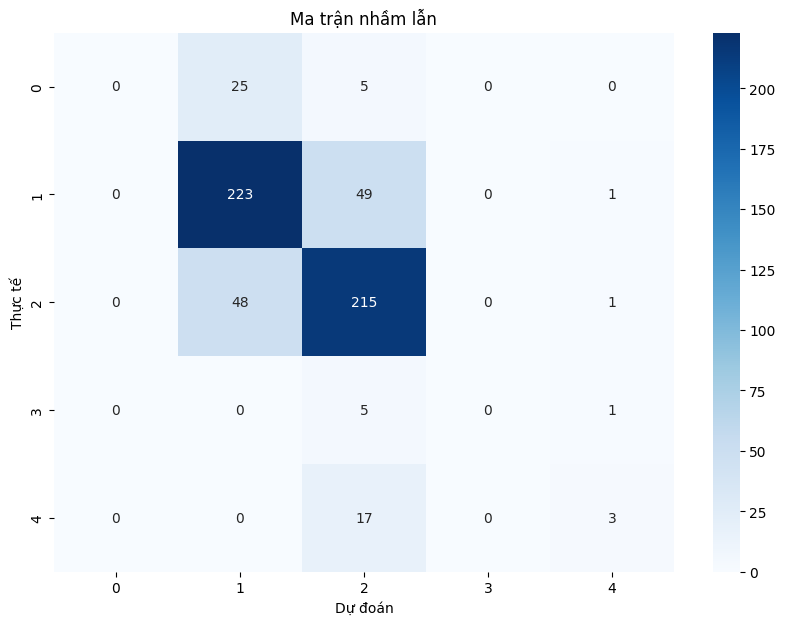

In [111]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

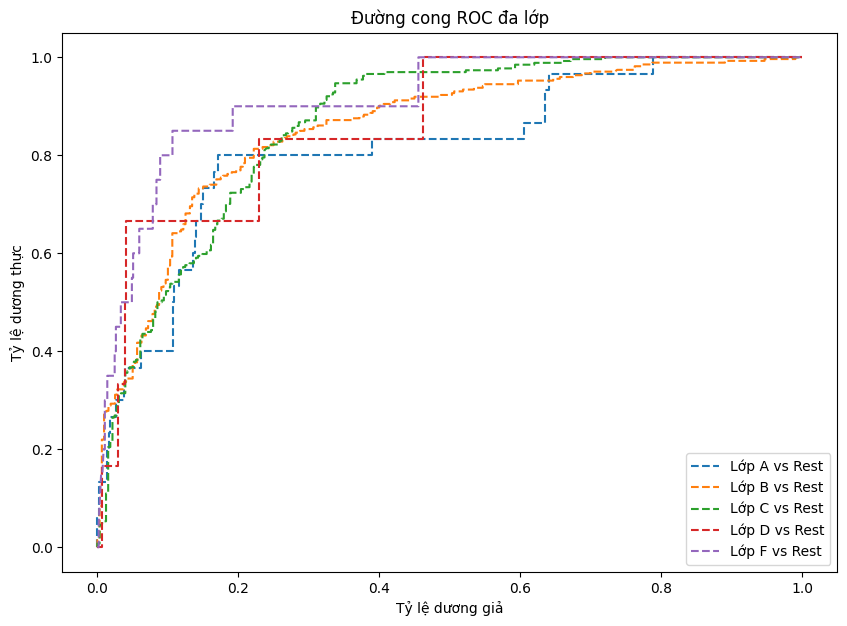

In [57]:
# Vẽ đường cong ROC cho từng lớp
fpr = {}
tpr = {}
thresh = {}

for i in range(len(model.classes_)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])

plt.figure(figsize=(10, 7))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Lớp {model.classes_[i]} vs Rest')

plt.title('Đường cong ROC đa lớp')
plt.xlabel('Tỷ lệ dương giả')
plt.ylabel('Tỷ lệ dương thực')
plt.legend(loc='best')
plt.show()

In [114]:
from sklearn.decomposition import PCA

# Sử dụng PCA để giảm chiều dữ liệu
pca = PCA(n_components=0.9)  # Số chiều mới mong muốn
X_pca = pca.fit_transform(X)

In [115]:
# Chia dữ liệu giảm chiều thành tập huấn luyện và tập kiểm tra
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [116]:
# Chuẩn hóa các đặc trưng của dữ liệu giảm chiều
scaler_pca = StandardScaler()
X_train_pca = scaler_pca.fit_transform(X_train_pca)
X_test_pca = scaler_pca.transform(X_test_pca)

In [117]:
# Huấn luyện lại mô hình Logistic Regression trên dữ liệu giảm chiều
model_pca = LogisticRegression(multi_class='ovr', max_iter=1000)
model_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [118]:
# Thực hiện dự đoán trên tập kiểm tra
y_pred_pca = model_pca.predict(X_test_pca)



In [119]:
# Đánh giá mô hình sau khi giảm chiều dữ liệu
accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print(f'Độ chính xác sau khi giảm chiều dữ liệu: {accuracy_pca:.4f}')

Độ chính xác sau khi giảm chiều dữ liệu: 0.7454


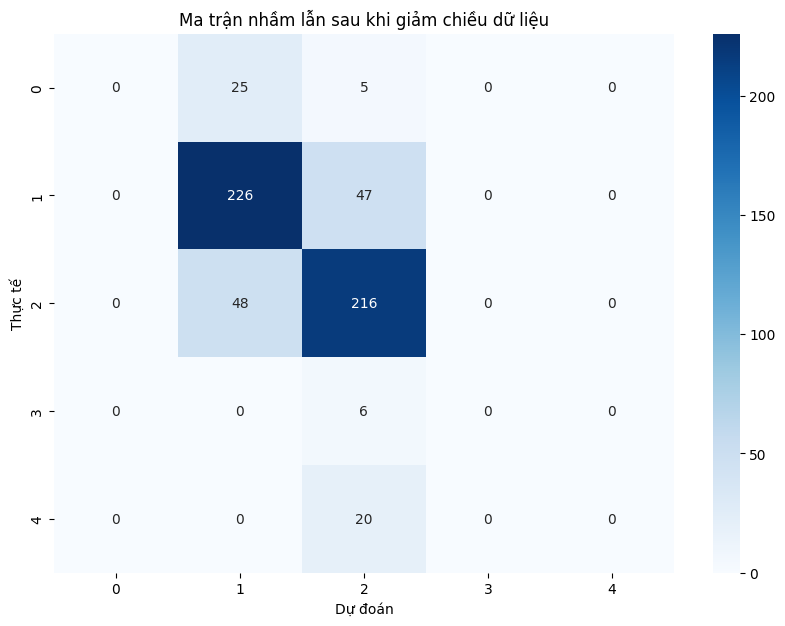

In [120]:
# Vẽ ma trận nhầm lẫn sau khi giảm chiều dữ liệu
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn sau khi giảm chiều dữ liệu')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()